In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [2]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels(RGB)
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#CONSTANT
BATCH_SIZE = 128 # images count after each neural network calculate loss error
NB_EPOCH = 20 # count of epoch
NB_CLASSES = 10 # count of images classes types
VERBOSE = 1
VALIDATION_SPLIT = 0.2 # 20% for test of images and 80% for training 
OPTIM = RMSprop() 

#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
#convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

#normalization images to 0-1 range from 0-255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#network
model = Sequential()
model.add(Conv2D(32,(3,3), padding="same", 
                 input_shape = (IMG_ROWS, IMG_COLS, IMG_CHANNELS))) # create feature map(contrast image)
model.add(Activation("relu")) # save active pixels >0
model.add(Conv2D(32,(3,3), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2))) # divide image to square 2*2 and get max value
model.add(Dropout(0.25)) # 25% filters off 
model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation("relu"))
model.add(Conv2D(64, 3, 3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) # create vector
model.add(Dense(512)) # vector of 512 elements
model.add(Activation("relu"))
model.add(Dense(NB_CLASSES)) # create finish vector with size 10 
model.add(Activation('softmax')) # find max activation element(find type of object)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [4]:
#train
model.compile(loss='categorical_crossentropy',optimizer = OPTIM,
             metrics = ['accuracy']) # use categorical_crossentropy function to minimase the error 
model.fit(X_train,Y_train,batch_size=BATCH_SIZE,verbose = VERBOSE, 
          epochs = NB_EPOCH, validation_split = VALIDATION_SPLIT)
score = model.evaluate(X_test,Y_test,batch_size=BATCH_SIZE,verbose = VERBOSE)

print("Test score:", score[0])
print('Test accuracy:', score[1])
#save
model_json = model.to_json()
open('cifar10_architecture.json','w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite = True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 72s 2ms/step - loss: 1.7489 - accuracy: 0.3679 - val_loss: 1.4381 - val_accuracy: 0.4826
Epoch 2/20
40000/40000 [==============================] - 67s 2ms/step - loss: 1.2581 - accuracy: 0.5556 - val_loss: 1.1256 - val_accuracy: 0.6105
Epoch 3/20
40000/40000 [==============================] - 65s 2ms/step - loss: 1.0322 - accuracy: 0.6343 - val_loss: 0.9675 - val_accuracy: 0.6642
Epoch 4/20
40000/40000 [==============================] - 65s 2ms/step - loss: 0.8793 - accuracy: 0.6912 - val_loss: 0.8577 - val_accuracy: 0.7000
Epoch 5/20
40000/40000 [==============================] - 65s 2ms/step - loss: 0.7542 - accuracy: 0.7361 - val_loss: 0.8426 - val_accuracy: 0.7078
Epoch 6/20
40000/40000 [==============================] - 64s 2ms/step - loss: 0.6441 - accuracy: 0.7721 - val_loss: 0.7277 - val_accuracy: 0.7504
Epoch 7/20
40000/40000 [==============================] - 65s 2ms/st

In [8]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(32, 32))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor





In [10]:
from keras.models import load_model
from keras.models import model_from_json
import json

with open('cifar10_architecture.json','r') as f:
    model_json = f.read()

model = model_from_json(model_json)
model.load_weights('cifar10_weights.h5')


In [11]:
target_classes = {
    0: "airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
}


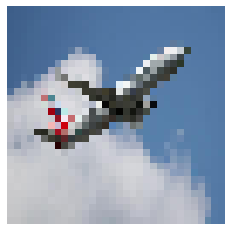

'airplane'

In [13]:
target_image = load_image("plane.jpg", True)
pred = model.predict_classes(target_image)
target_classes[pred[0]]